## Bitcoin power consumption calculation based on hash rate
The current <a href='https://blockchain.info/charts/hash-rate'>hash rate</a> is about $15 \cdot 10^6$ TH/s (2017-12-07). Assuming best case scenario with everyone using the most efficient miner <a href='https://shop.bitmain.com/specifications.htm?name=antminer_s9_asic_bitcoin_miner'>Antminer S9</a> at 98 J/TH. Multiplying the two, we get
$$15 \cdot 10^6 \text{ TH/s} \cdot 98 \text{ J/TH} = 1.47 \text{ GJ/s} = 1.47 \text{ GW}$$
Giving us the daily energy consumption $35.28$ GWh.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

%matplotlib notebook

In [2]:
# Load raw hashrate data over the last two years
# Downloaded from https://blockchain.info/charts/hash-rate
df = pd.read_csv('data/hash_rate_raw.csv', names=['Date', 'Hashrate'])

# Set Date column to datetime
df.Date = pd.to_datetime(df.Date)
#df.Date = df.Date.dt.date

In [3]:
df.info()
print('\n','>'*40)
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 2 columns):
Date        730 non-null datetime64[ns]
Hashrate    730 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 11.5 KB

 >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


,Date,Hashrate
0,2015-12-08,625219.908580
1,2015-12-09,695999.520873
2,2015-12-10,770711.333848
3,2015-12-11,688135.119507
4,2015-12-12,656677.514044


<IPython.core.display.Javascript object>


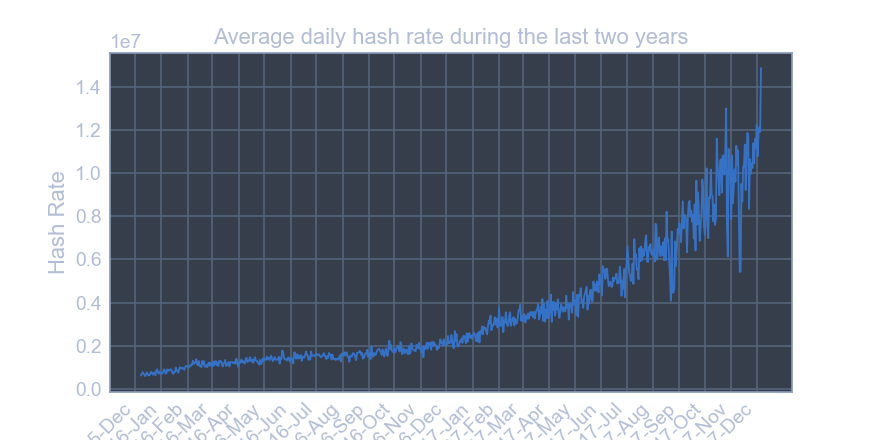

In [4]:
# Plot the data
plt.figure(figsize=(8, 4))
plt.plot(df.Date, df.Hashrate)
plt.ylabel('Hash Rate')
plt.xlabel('Date')
plt.title('Average daily hash rate during the last two years')

from matplotlib.dates import DateFormatter
ax = plt.axes()
# Offset: include end month
drange = pd.date_range(min(df.Date), max(df.Date) + pd.offsets.MonthEnd(), freq='M').strftime('%Y-%m')
# Set xaxis tick on every other month
ax.xaxis.set_ticks(drange)
ax.xaxis.set_major_formatter(DateFormatter('%Y-%b'))

ax.xaxis_date()
ax.autoscale_view()
# ax.set_yscale('linear') # Params: {“linear”, “log”, “symlog”, “logit”}

# 
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

<IPython.core.display.Javascript object>


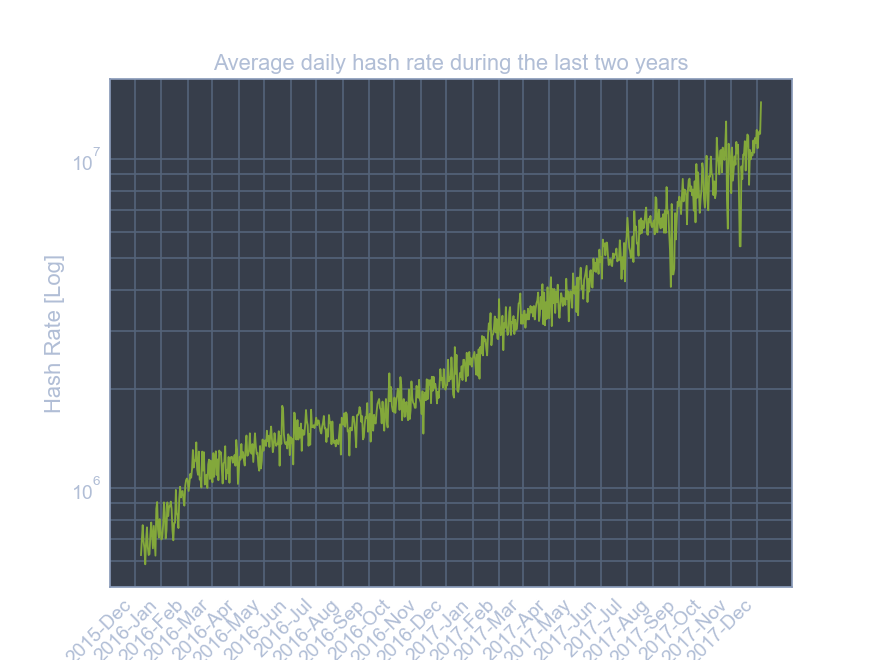

In [10]:
# Logarithmic plot of the data
plt.figure(figsize=(8,6))
plt.plot(df.Date, df.Hashrate, 'g')
plt.ylabel('Hash Rate [Log]')
plt.xlabel('Date')
plt.title('Average daily hash rate during the last two years')

ax = plt.axes()
# Set xaxis tick on every other month
ax.xaxis.set_ticks(drange)
ax.xaxis.set_major_formatter(DateFormatter('%Y-%b'))

ax.set_yscale('log') # Params: {“linear”, “log”, “symlog”, “logit”}
# Proper way to create ticks as: https://stackoverflow.com/a/44079725/4461051
ax.yaxis.set_major_locator(matplotlib.ticker.LogLocator(subs='all'))

ax.autoscale_view()
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [ ]:
import re
# Import Bitcoin price data from 2015-12-07 to 2017-12-06
price_df = pd.read_csv('price.csv', delimiter='\t')
# Set Date data to datetime
price_df.Date = pd.to_datetime(price_df.Date)

# Set Volumen and Market Cap data to int
price_df['Volume'] = price_df['Volume'].apply(lambda x: re.sub(',', '', str(x)))
price_df['Volume'] = pd.to_numeric(price_df['Volume'])
price_df['Market Cap'] = price_df['Market Cap'].apply(lambda x: re.sub(',', '', str(x)))
price_df['Market Cap'] = pd.to_numeric(price_df['Market Cap'])

price_df = price_df[::-1]

<IPython.core.display.Javascript object>


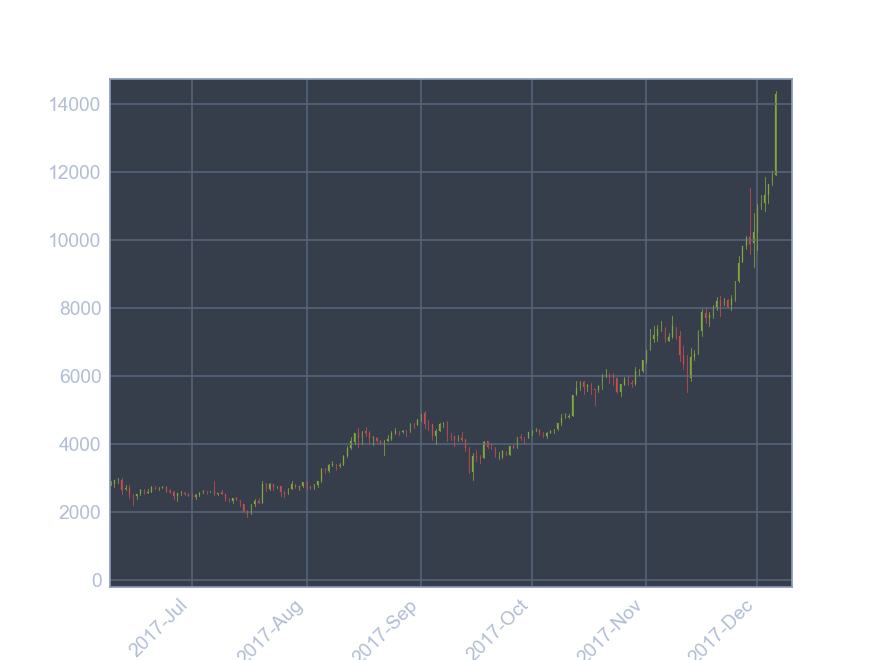

In [26]:
from matplotlib.finance import candlestick_ohlc

price_plt_df = price_df.drop(['Market Cap'], axis=1)
price_plt_df.Date = price_plt_df.Date.apply(matplotlib.dates.date2num)

plt.figure(figsize=(8,6))
ax = plt.axes()
candlestick_ohlc(ax, price_plt_df.values, colorup='g', colordown='r')

ax.xaxis_date()
drange = pd.date_range(min(price_df.Date), max(price_df.Date) + pd.offsets.MonthEnd(), freq='M').strftime('%Y-%m')
plt.xticks(drange)
ax.xaxis.set_major_formatter(DateFormatter('%Y-%b'))
ax.autoscale_view()

plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

#ax.xaxis_date()

Log fit and prediction of future consumption


In [30]:
price_df

,Open,High,Low,Close,Volume,Market Cap
count,731.000000,731.000000,731.000000,731.000000,7.310000e+02,7.310000e+02
mean,1729.821327,1790.424049,1686.806142,1748.729904,7.343684e+08,2.832923e+10
std,2029.372843,2139.442821,1975.772896,2081.349229,1.333786e+09,3.397772e+10
min,365.070000,374.950000,354.910000,364.330000,2.851400e+07,5.507790e+09
25%,568.475000,575.140000,560.690000,569.570000,6.834235e+07,8.949465e+09
50%,769.940000,774.800000,759.750000,770.810000,1.305270e+08,1.234400e+10
75%,2327.925000,2436.805000,2272.515000,2347.845000,9.627240e+08,3.829185e+10
max,11923.400000,14369.100000,11923.400000,14291.500000,1.265630e+10,1.993900e+11
